**Tutorial 7 - Markov Chain Monte Carlo**

In this tutorial we will learn how to construct a basic Metropolis-Hastings Markov Chain sampler and apply it to supernova data.


In [1]:
# 1) Make a Metropolis-Hastings stepping function.
#
# The function should take the following inputs 
# x - the current position in parameter space
# loglike - the value of the log of the likelihood 
#           evaluated at x
# loglike_func - a function the returns to log of the 
#            likelihood given a position in parameters space
# proposal_func - a proposal function that takes a position in 
#                  parameter space and proposes another
#
# The function should return the updated position, the updated 
# loglike and a boolean that is True if the proposed step was 
# accepted and False if it wasn't. 
# You can assume the proposal function is symmetric.

%matplotlib inline
import time
import pandas as pa
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import random


def MH_step(x,loglike,loglike_func,proposal_func):
    '''
    Metropolis-Hastings Monte Carlo Step
    '''
    y = proposal_func(x)
    new_loglike = loglike_func(y)
    
    if( new_loglike > loglike ):
        return y,new_loglike,True
    
    if( random.random() < np.exp(new_loglike - loglike) ) :
        return y,new_loglike,True
        
    return x,loglike,False


In [2]:
# 2) Complete this code for a Gaussian proposal function class

class gaussian_transfer_function :
    
    ## This part is the constructor and 
    ## sets the internal information in the object
    # that is declared with
    # "func = gaussian_transfer_function(sigma_vector)"
    def __init__(self, sigma):
        self.n = len(sigma)
        self.s = sigma
    ##  This part defines what happens when 
    ##  you do "y = func(x)"
    ##  This should return a new point
    def __call__(self,x):
        return ________________


In [3]:
### This is a class for a Gaussian proposal function
from scipy.stats import norm
class gaussian_transfer_function :
    def __init__(self, sigma):
        self.n = len(sigma)
        self.s = sigma
    def __call__(self,x):
        return self.s*norm.rvs(size=self.n) + x


In [ ]:
# 3) Make a Gaussian likelihood class of the form

#class LogGaussianLikelihood :
#    def __init__(self,y_data,x_data,y_model,sigma):
#    
#         store the data, model and errors in the object
#         The function y_model(params,x_data) will return the 
#         predicted value for y to be compared to y_data
#
#    def __call__(self,params):
#         
#        Using the stored data and model to calculate 
#        the log of the Gaussian likelihood and return 
#        its value.
#        

In [4]:
class LogGaussianLikelihood :
    def __init__(self,y_data,x_data,y_model,sigma):       
        self.sigma = sigma 
        self.y_data = y_data
        self.x_data = x_data
        self.y_model = y_model
        
    def __call__(self,p):
        y = self.y_model(p,self.x_data)
        x =  (self.y_data - y)/self.sigma
        
        return -0.5*np.sum(x**2)


4) Write a function that returns the distance modulus with 
signature def mu_model(p,z). 

parameters p are 

p[0] is the absolute magnitude normalization 

p[1] is omega_matter.  

Use the library function 
astropy.cosmology.FlatLambdaCDM.luminosity_distance(z).value 
to calculate the luminosity distance.


In [5]:
#from astropy.cosmology import FRW
import astropy.cosmology as cosmo
def mu_model(p,z):
    if(p[1] < 0 or p[1] > 1):
        return -1.0e100

    #if(p[2] < 0 or p[2] > 1):
    #    return -1.0e100

    #cos = cosmo.LambdaCDM(70,p[1],p[2])
    cos = cosmo.FlatLambdaCDM(70,p[1])
    #return p[0] + 5*np.log10(cos.luminosity_distance(z).value)  
    return p[0] + 5*np.log10(cos.luminosity_distance(z).value)

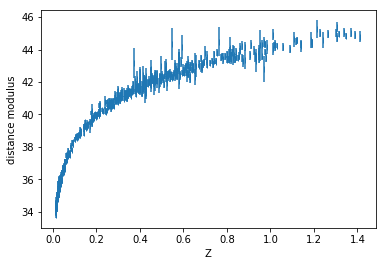

In [7]:
# Read in the supernova data
#
data = pa.read_csv("tutorials/SCPUnion2.1_mu_vs_z.txt",sep='\t',comment='#')

z = data['redshift']
mu = data['dist_mod']
mu_err = data['dist_mod_error']

plt.errorbar(z,mu,yerr=mu_err,fmt='|')
plt.xlabel('Z')
plt.ylabel('distance modulus')
plt.show()

In [ ]:
# 5) 
## Make an instance of LogGaussianLikelihood with the data.
## Call it loglike_func

## Make an instance of gaussian_transfer_function

## Set up the initial point p[] and its log likelihood 
## using  loglike_func(p)

## Make an MCMC loop 1000 steps or more long and make a scatter plot of 
## the chain.  Record the acceptance fraction.


KeyboardInterrupt: 

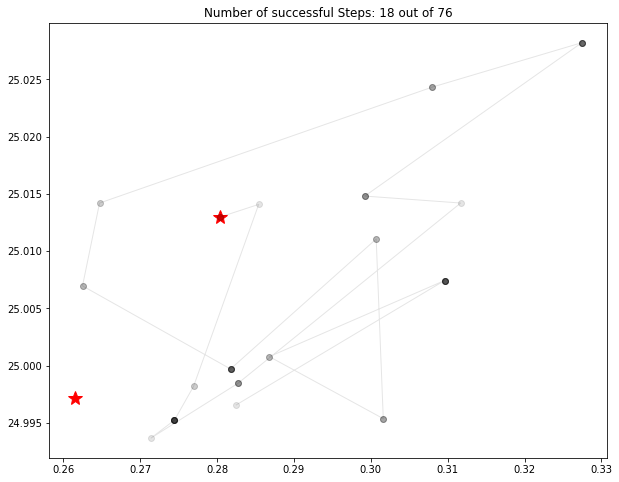

In [41]:

loglike_func = LogGaussianLikelihood(mu,z,mu_model,mu_err)
#trany = gaussian_transfer_function(np.array([0.1,0.1,0.1]))
trany = gaussian_transfer_function(np.array([0.1,0.1]))


## initial value
#p = np.array([25.0,1.0,0.0])
p = np.array([25.0,1.0])
loglike_val = loglike_func(p)

### MCMC loop
Nmcmc =300
X = np.zeros(Nmcmc)
Y = np.zeros(Nmcmc)
#Z = np.zeros(Nmcmc)

nstep = 0
for i in range(0,Nmcmc) :
    #print(x,loglike_val)
    p,loglike_val,step = MH_step(p,loglike_val,loglike_func,trany)
    X[i] = p[0]
    Y[i] = p[1]
    #Z[i] = p[2]
    #print p
    if(step):
        nstep = nstep + 1        
        
### MCMC loop
Nmcmc =10000
X = np.zeros(Nmcmc)
Y = np.zeros(Nmcmc)
#Z = np.zeros(Nmcmc)

#trany = gaussian_transfer_function(np.array([0.1,0.1,0.1]))
trany = gaussian_transfer_function(np.array([0.02,0.03]))

plt.figure(figsize=(10,8))
plt.xlabel(r'$\Omega_m$')
plt.ylabel('M')
# plt.xlim(0.2,0.3)
# plt.ylim(23.0,26.0)

nstep = 0
for i in range(0,Nmcmc) :
    #print(x,loglike_val)
    p,loglike_val,step = MH_step(p,loglike_val,loglike_func,trany)
    X[i] = p[0]
    Y[i] = p[1]
    #Z[i] = p[2]
    #print p
    if(step):
        nstep = nstep + 1
        
    #plt.scatter(Y[i],X[i], alpha=0.1)
    plt.plot(Y[0],X[0],'*', color='red', ms = 15)
    plt.plot(Y[:i],X[:i],'-o', alpha=0.1, color='black', lw=1.0)
    plt.plot(Y[i],X[i],'*', color = 'red', ms = 15)
    plt.title('Number of successful Steps: %s out of %s' %(nstep,i))
    display.clear_output(wait=True)
    display.display(plt.gcf())
    plt.clf()
    #time.sleep(0.001)
        
print 'acceptance rate :',100.*nstep/Nmcmc,' %'

#plt.scatter(Y,Z,alpha=0.1,s=2.0)
#plt.xlabel(r'$\Omega_m$')
#plt.ylabel(r'$\Omega_\Lambda$')
#plt.plot([1.0,0],[0.0,1.0],linestyle=':')
#plt.xlim(np.min(Y),np.max(Y))
#plt.ylim(np.min(Z),np.max(Z))
#plt.show()

# plt.scatter(Y,X,alpha=0.1)
# plt.xlabel(r'$\Omega_m$')
# plt.ylabel('M')

plt.show()


6) Make historgrams of the two parameters.

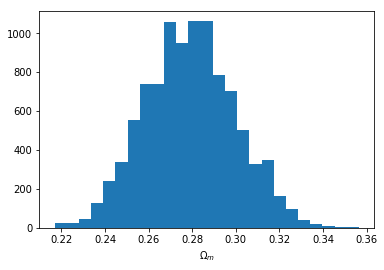

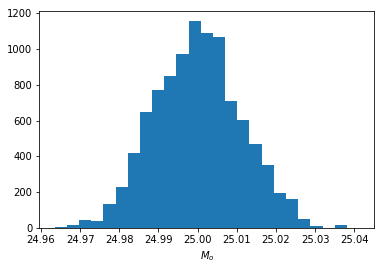

In [23]:
## 6)
plt.hist(Y,bins=25)
plt.xlabel(r'$\Omega_m$')
plt.show()

plt.hist(X,bins=25)
plt.xlabel(r'$M_o$')
plt.show()

7) Use numpy.histogram2d() to make a 2 dimensional of the chain.

In [24]:
## 8) Use this function to estimate the correlation length 
## of your chain. Plot the autocorrelation function for 
## lag zero to a few hundred.
def corrfunction(x,y):
    '''
    This function calculates the correlation coefficient 
    as a function of lag between 
    '''
    xc = x - np.mean(x)
    yc = y - np.mean(y)
    
    N = len(x)
    out = np.empty(N-2)
    stdx = np.std(xc)
    stdy = np.std(yc)

    for i in range(N-2) :
        xt = xc[0:N-i]
        yt = yc[i:N]
        if(stdx == 0 or stdy == 0):  ## this can happen for last elements
            out[i] = 0
        else :
            out[i] = np.mean(xt*yt)/stdx/stdy

    return out


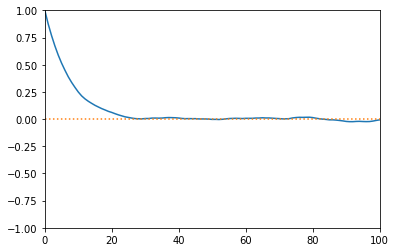

In [25]:
c = corrfunction(Y,Y)

plt.plot(c)
plt.xlim(0,100)
plt.ylim(-1,1)
plt.plot([0,200],[0,0],linestyle=':')
plt.show()

8) Calculate the mean, variance and covariance of the parameters.

In [26]:
print 'Omega_m = ',np.mean(Y),' +/- ',np.std(Y)
print 'M_0 = ',np.mean(X),' +/- ',np.std(X)

Omega_m =  0.279108100587  +/-  0.0208038876188
M_0 =  25.0001032196  +/-  0.0110929098639
